In [36]:
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
import causallearn

from causallearn.utils.cit import *
from causallearn.graph.GraphClass import CausalGraph
import pandas as pd
from itertools import combinations, permutations
from numpy import ndarray
from typing import Dict, List, Tuple
from causallearn.utils.cit import fisherz
import random


import time

import scipy as sp
from scipy.stats import beta

from statsmodels.distributions.empirical_distribution import ECDF


# Traffic Model:

## Null hypothesis $H_0$: Accidents happen independently of traffic load

In [37]:
# Number of days:
N = 365 * 3
# Number of discretized steps:
# If each timestep represents 10 mins, then T = 108 would represent 18 hours.
T = 108

p_acc = 0.01
x_eq = 100
mu = 0.2
mu_acc = 0.02
time_duration_acc = 5
noise_range = 5
ctrl = mu * x_eq

T_acc_vec = np.random.geometric(p = p_acc, size = N)
noise_array = np.random.rand(N, T) * 2 * noise_range - noise_range
x_array_H0 = np.zeros((N, T))
x_0 = np.random.rand(N) * 2 * noise_range - noise_range + x_eq

x_array_H0[:, 0] = x_0
for t in range(T-1):
    x_array_H0[:, t+1] = (1-mu) * x_array_H0[:, t] + ctrl + noise_array[:, t]

# Changing load due to dynamics:
# for i in range(N):
#     if T_acc_vec[i] < T:
#         for k in range(T_acc_vec[i], min(T, T_acc_vec[i] + time_duration_acc)):
            


In [29]:
# T_acc_vec

In [30]:
list(range(2, 5))

[2, 3, 4]

## Alternative hypothesis $H_1$: Accidents are made more likely by high traffic load

In [31]:
start_time = time.time()

# Number of days:
N = 365 * 3
# Number of discretized steps:
# If each timestep represents 10 mins, then T = 108 would represent 18 hours.
T = 108

x_eq = 100
mu = 0.3
mu_acc = 0.2
time_duration_acc = 2
noise_range = 10
ctrl = mu * x_eq

noise_array = np.random.rand(N, T) * 2 * noise_range - noise_range
x_array_H1 = np.zeros((N, T))
# x_0 = np.random.rand(N) * 2 * noise_range - noise_range + 0.5 * x_eq
x_0 = np.random.rand(N) * 2 * noise_range - noise_range + 1 * x_eq

p_acc = 0.001
p_acc_high_load = 0.3
acc_vec = np.random.binomial(1, p = p_acc, size = (N, T))
acc_vec_high_load = np.random.binomial(1, p = p_acc_high_load, size = (N, T))
acc_realized = np.zeros((N, T))

high_load_threshold = x_eq + 0.95 * noise_range
counter = 0


x_array_H1[:, 0] = x_0
for i in range(N):
    for t in range(T-1):
        if t == 0:
            acc_realized[i, t] = 0
            x_array_H1[i, t+1] = (1 - mu) * x_array_H1[i, t] + ctrl + noise_array[i, t]
            counter = 0
        elif counter >= 1 and counter < time_duration_acc:
#         if counter >= 1 and counter < time_duration_acc:
            acc_realized[i, t] = 1
            x_array_H1[i, t+1] = (1 - mu_acc) * x_array_H1[i, t] + ctrl + noise_array[i, t]
            counter += 1
        elif x_array_H1[i, t] <= high_load_threshold and acc_vec[i, t] == 1:
            acc_realized[i, t] = 1
            x_array_H1[i, t+1] = (1 - mu_acc) * x_array_H1[i, t] + ctrl + noise_array[i, t]
            counter = 1
        elif x_array_H1[i, t] > high_load_threshold and acc_vec_high_load[i, t] == 1:
            acc_realized[i, t] = 1
            x_array_H1[i, t+1] = (1 - mu_acc) * x_array_H1[i, t] + ctrl + noise_array[i, t]
            counter = 1
        else:
            acc_realized[i, t] = 0
            x_array_H1[i, t+1] = (1 - mu) * x_array_H1[i, t] + ctrl + noise_array[i, t]
            counter = 0

# Changing load due to dynamics:
# for i in range(N):
#     if T_acc_vec[i] < T:
#         for k in range(T_acc_vec[i], min(T, T_acc_vec[i] + time_duration_acc)):


end_time = time.time()

print("Time: ", end_time - start_time)



Time:  0.20323872566223145


In [32]:
# high_load_threshold

print(acc_realized[0, :])
print("\n")
print(x_array_H1[0, :])

[0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


[105.77436873 103.94063355 105.50140299 108.71016703 114.03145215
 116.06318656 124.15243247 128.93404837 127.1891595  141.70854909
 138.71728833 125.95060269 121.42358915 109.48687799 103.07774201
 110.45824438 117.90951225 130.29828618 129.68257271 129.98097513
 119.1002066  130.37890356 135.95273436 134.32700007 123.83481745
 115.15524953 115.74266542 120.59787141 113.5879506  121.67053457
 135.99985121 124.08851741 123.86633106 127.58700499 119.05406335
 106.99090592  97.2565829  101.88629898  98.75480667  92.83989661
 103.85474759 106.62011438 107.32534198 102.46161787  93.36829223
  90.7777937   93.10959084 103.71674678 102.54830658 101.44885078
  91.928

In [43]:
x_array_H0

array([[ 97.22813666,  97.0171259 , 101.54540344, ..., 105.76759378,
        100.47498462,  96.2403578 ],
       [ 96.00319771,  96.53397674,  94.17090074, ...,  95.28371332,
        100.15121389, 102.9537346 ],
       [ 96.31670555,  95.09808873,  99.36808315, ...,  97.73532368,
         98.17587103,  96.1170332 ],
       ...,
       [ 97.11592799,  93.76783045,  99.0428968 , ...,  90.50148153,
         87.73651769,  89.60717508],
       [101.46969764, 100.84894337, 101.76678763, ...,  92.69917616,
         91.26966701,  91.03252065],
       [104.89458504,  98.97518646,  94.51712365, ...,  95.05651053,
         95.36265965,  97.27319917]])

In [53]:
acc_realized.shape[1]

108

In [38]:
def constructXTLessX(x_array, acc_realized):
    for T in range(acc_realized.shape[1])

array([[105.77436873, 103.94063355, 105.50140299, ..., 101.83373532,
        101.5768143 ,  96.36253536],
       [ 90.70083078,  93.98832131, 104.32093033, ...,  94.83223543,
         93.31309367, 103.30312997],
       [ 93.23264116,  85.94259488,  94.0651849 , ...,  92.95992649,
         98.74975197,  94.70541138],
       ...,
       [ 94.96023441,  98.46995682, 103.16770913, ..., 113.58884664,
        110.00867645, 111.57012607],
       [ 96.75739759, 103.1568077 ,  93.55205087, ..., 106.28019091,
         99.36182983,  93.64176383],
       [ 92.86246628,  88.91534884,  86.81911831, ..., 109.86806004,
        114.2590934 , 121.7981996 ]])

In [ ]:
a_array

In [33]:
# acc_realized.shape
# acc_realized

print(acc_vec)
print(acc_vec_high_load)
print(acc_realized)
print(np.count_nonzero(acc_realized == 1)/(N*T))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 1 0]
 [1 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 1 1 0]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 0.]]
0.14317605276509385


In [34]:
x_array_H0.shape

(1095, 108)

In [35]:
x_array_H1.shape

(1095, 108)

In [28]:
# T_acc_vec = np.ones(N) * T
# for i in range(N):
#     if np.any(acc_realized[i, :] == 1):
#         T_acc_vec[i] = min([t for t in range(T) if acc_realized[i, t] == 1])

# T_acc_set_sorted = np.sort(np.array(list(set(T_acc_vec))))

# acc_times_dict = {}



# for acc_time in T_acc_set_sorted:
#     days_list = [i for i in range(N) if T_acc_vec[i] == acc_time]
#     acc_times_dict[acc_time] = days_list

# acc_times_dict.keys()

# # T_acc_set_sorted.shape[0]


## a) Grouping by each accident time:

In [17]:
T_acc_vec = np.ones(N) * T
for i in range(N):
    if np.any(acc_realized[i, :] == 1):
        T_acc_vec[i] = min([t for t in range(T) if acc_realized[i, t] == 1])

T_acc_set_sorted = np.sort(np.array(list(set(T_acc_vec))))


acc_times_dict = {}
# To edit, using T_acc_set_sorted.shape[0] and T (time = T * 10 mins).
acc_times_sampling_rate_by_hour = 1
acc_times_sampling_rate = int(T_acc_set_sorted.shape[0]*6/T)
T_acc_set_sorted_sampled = [T_acc_set_sorted[j] for j in range(T_acc_set_sorted.shape[0]) if j % acc_times_sampling_rate == 0]

acc_time_previous = 0
for acc_time in T_acc_set_sorted_sampled:
    days_list = [i for i in range(N) if T_acc_vec[i] > acc_time_previous and T_acc_vec[i] <= acc_time]
    acc_times_dict[acc_time] = days_list
    acc_time_previous = acc_time

# acc_times_dict.keys()
# acc_times_dict
# T_acc_set_sorted_sampled

# T_acc_set_sorted.shape[0]



In [18]:
print(T_acc_set_sorted.shape[0])
print(acc_times_sampling_rate)

102
5


In [19]:
for acc_time_id in range(len(acc_times_dict.keys())-1):
    acc_time = list(acc_times_dict.keys())[acc_time_id]
    sample_acc = [x_array_H1[i, int(acc_time) - 1] for i in [*acc_times_dict.values()][acc_time_id]]
    sample_no_acc = [x_array_H1[i, int(acc_time) - 1] for i in [*acc_times_dict.values()][acc_time_id + 1]]
    
    print("acc_time_id:", acc_time_id)
    print("len(sample_acc):", len(sample_acc))
    print("len(sample_no_acc):", len(sample_no_acc))
#     print(sp.stats.kstest(sample_acc, sample_no_acc))
    print(sp.stats.ks_2samp(sample_acc, sample_no_acc))
    print()

# print(sample_acc)
# print("\n")
# print(sample_no_acc)


acc_time_id: 0
len(sample_acc): 43
len(sample_no_acc): 151
KstestResult(statistic=0.5727706761127368, pvalue=8.016387553766435e-11)

acc_time_id: 1
len(sample_acc): 151
len(sample_no_acc): 116
KstestResult(statistic=0.6991322219684859, pvalue=7.61482342174659e-33)

acc_time_id: 2
len(sample_acc): 116
len(sample_no_acc): 106
KstestResult(statistic=0.7677293428757319, pvalue=1.7658851456586846e-34)

acc_time_id: 3
len(sample_acc): 106
len(sample_no_acc): 95
KstestResult(statistic=0.7372393247269117, pvalue=0.0)

acc_time_id: 4
len(sample_acc): 95
len(sample_no_acc): 83
KstestResult(statistic=0.7833861762840837, pvalue=6.661338147750939e-16)

acc_time_id: 5
len(sample_acc): 83
len(sample_no_acc): 69
KstestResult(statistic=0.7202723939235202, pvalue=1.611144979137463e-20)

acc_time_id: 6
len(sample_acc): 69
len(sample_no_acc): 57
KstestResult(statistic=0.7238749046529367, pvalue=8.881784197001252e-16)

acc_time_id: 7
len(sample_acc): 57
len(sample_no_acc): 45
KstestResult(statistic=0.73099

## b) Aggregate across accident times:

In [20]:
# list_1 = [1]
# list_2 = [2]
# list_1.extend(list_2)
# list_1

In [21]:
# T_acc_vec = np.ones(N) * T
# for i in range(N):
#     if np.any(acc_realized[i, :] == 1):
#         T_acc_vec[i] = min([t for t in range(T) if acc_realized[i, t] == 1])

# T_acc_set_sorted = np.sort(np.array(list(set(T_acc_vec))))

# T_acc_set_sorted_sampled = [T_acc_set_sorted[j] for j in range(T_acc_set_sorted.shape[0])]

# acc_time_previous = 0
# acc_times_dict = {}
# for acc_time in T_acc_set_sorted_sampled:
#     days_list = [i for i in range(N) if T_acc_vec[i] > acc_time_previous and T_acc_vec[i] <= acc_time]
#     acc_times_dict[acc_time] = days_list
#     acc_time_previous = acc_time

# # acc_times_dict.keys()
# # T_acc_set_sorted_sampled

In [23]:
# sample_acc = []
# sample_no_acc = []

# for count, acc_time in enumerate(acc_times_dict.keys()):
#     if count % 2 == 0 and count + 1 <= len(acc_times_dict.keys())-1:
# #         print(count)
# #         print(len(acc_times_dict.keys()))
# #         print()
#         sample_acc.extend([x_array_H1[i, int(acc_time) - 1] for i in [*acc_times_dict.values()][count]])
#         sample_no_acc.extend([x_array_H1[i, int(acc_time) - 1] for i in [*acc_times_dict.values()][count + 1]])

# # print("acc_time_id:", acc_time_id)
# # print("len(sample_acc):", len(sample_acc))
# # print("len(sample_no_acc):", len(sample_no_acc))
# print(sp.stats.kstest(sample_acc, sample_no_acc))
# # print(sp.stats.ks_2samp(sample_acc, sample_no_acc))
# print()


# # print(sample_acc)
# # print("\n")
# # print(sample_no_acc)




# Plot Results:

In [24]:
# def cdf_from_samples(sample):
    
    

P(x<-20): 0.000
P(x<0): 0.487
P(x<20): 1.000


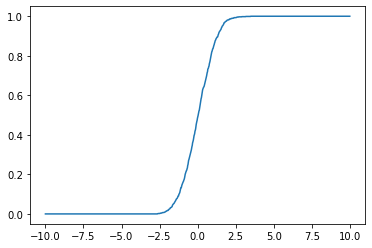

In [25]:
# Test:

sample = np.random.randn(1000)
ecdf = ECDF(sample)

print('P(x<-20): %.3f' % ecdf(-20))
print('P(x<0): %.3f' % ecdf(0))
print('P(x<20): %.3f' % ecdf(20))

cdf_data_test = ecdf(np.linspace(-10, 10, num=1000))
plt.plot(np.linspace(-10, 10, num=1000), cdf_data_test)


acc_time_id: 1
len(sample_acc): 151
len(sample_no_acc): 116
KstestResult(statistic=0.6991322219684859, pvalue=7.61482342174659e-33)



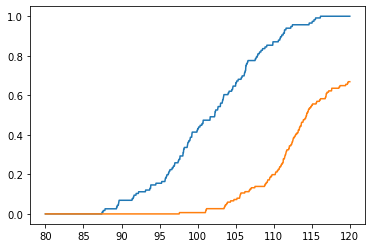

In [26]:
# for acc_time_id in range(len(acc_times_dict.keys())-1):
for acc_time_id in [1]:
    acc_time = list(acc_times_dict.keys())[acc_time_id]
    sample_acc = [x_array_H1[i, int(acc_time) - 1] for i in [*acc_times_dict.values()][acc_time_id]]
    sample_no_acc = [x_array_H1[i, int(acc_time) - 1] for i in [*acc_times_dict.values()][acc_time_id + 1]]
    
    print("acc_time_id:", acc_time_id)
    print("len(sample_acc):", len(sample_acc))
    print("len(sample_no_acc):", len(sample_no_acc))
#     print(sp.stats.kstest(sample_acc, sample_no_acc))
    print(sp.stats.ks_2samp(sample_acc, sample_no_acc))
    print()


ecdf_acc = ECDF(sample_acc)
ecdf_no_acc = ECDF(sample_no_acc)

plot_x_range = np.linspace(x_eq - 2 * noise_range, x_eq + 2 * noise_range, num=1000)
cdf_no_acc = ecdf_no_acc(plot_x_range)
cdf_acc = ecdf_acc(plot_x_range)
plt.plot(plot_x_range, cdf_no_acc)
plt.plot(plot_x_range, cdf_acc)


In [18]:
print(acc_vec)
print("\n")
print(acc_realized)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 0.]]


# Scratch Work:

In [19]:
# K-test:

rng = np.random.default_rng()
# sample1 = sp.stats.laplace.rvs(size=105, random_state=rng)
# sample2 = sp.stats.laplace.rvs(size=95, random_state=rng)
sample1 = np.random.randn(1000) + 0.1
sample2 = np.random.randn(1000)

print(sp.stats.kstest(sample1, sample2))

KstestResult(statistic=0.053, pvalue=0.12051526066065596)


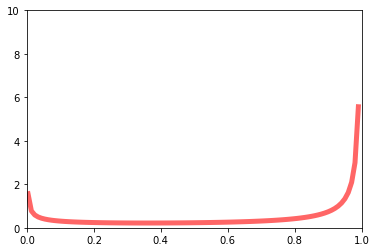

In [20]:
# Beta distribution, for accidents:

fig, ax = plt.subplots(1, 1)
# a, b = 2.31, 0.627
a, b = 0.5, 0.1

mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(beta.ppf(0.01, a, b),
                beta.ppf(0.99, a, b), 100)
plt.xlim([0.0, 1.0])
plt.ylim([0, 10])
ax.plot(x, beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')
